# Superdense Coding

Parts of this notebook are inspired by Michael Loceffs script "A Course in Quantum Computing", which is a very well written introductions to quantum computing.

Claim: We can send two bits of information with only one qubit. Careful: It may seem like a qubit contains an infinite amount of information, since we describe the state with two complex numbers, however the state collapses during measurement.
For the algorithm we'll make use of the four Bell states:
* $\lvert\beta_{00}\rangle = \frac{\lvert{00}\rangle + \lvert{11}\rangle}{\sqrt{2}}$
* $\lvert\beta_{01}\rangle = \frac{\lvert{01}\rangle + \lvert{10}\rangle}{\sqrt{2}}$
* $\lvert\beta_{10}\rangle = \frac{\lvert{00}\rangle - \lvert{11}\rangle}{\sqrt{2}}$
* $\lvert\beta_{11}\rangle = \frac{\lvert{01}\rangle - \lvert{10}\rangle}{\sqrt{2}}$

First we need to prepare the state $\lvert\beta_{00}\rangle$, which can be done with the following circuit:
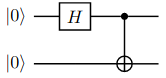

In [1]:
psi_0 = matrix([1, 0]).transpose()
# states of multiple qubits can be derived with the tensor product of single qubit states
psi_00 = psi_0.tensor_product(psi_0)
pretty_print(psi_00)

[1]
[0]
[-]
[0]
[0]

In [2]:
# parallel gates are the tensor product of the individual gates
# "no gate" is equivalent to the identity matrix
H = 1 / sqrt(2) * matrix([[1, 1], [1, -1]])
H_2 = H.tensor_product(identity_matrix(2))
CNOT = matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
pretty_print(H_2, CNOT)

[ 1/2*sqrt(2)            0| 1/2*sqrt(2)            0]
[           0  1/2*sqrt(2)|           0  1/2*sqrt(2)]
[-------------------------+-------------------------]
[ 1/2*sqrt(2)            0|-1/2*sqrt(2)            0]
[           0  1/2*sqrt(2)|           0 -1/2*sqrt(2)] [1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 1 0]

In [3]:
# lets prepare the bell state
# careful: multiplication is done in reverse order compared to the circuit diagram, 
# since gates are applied from the left
bell_00 = CNOT * H_2 * psi_00
pretty_print(bell_00)

[1/2*sqrt(2)]
[          0]
[          0]
[1/2*sqrt(2)]

Qubits in the bell state are entangled, we can see from the ket that either both collapse to 0 or both collapse to 1. In a preparation step, Alice and Bob both take one of the qubits. This can be done any time before the communication takes place and the qubits can be spatially seperated (we "only" need to asure, that the qubits are not disturbed and lose their entaglement).
The qubits are spatially seperated, but still represent an inseperable common state!

To encode her message, Alice applies one of the following gates:

| Alice wants to send | Alice applies | Equivalent binary gate         | New state                 |
|:-------------------:|:-------------:|:------------------------------:|:-------------------------:|
|               $$00$$|        nothing|$$\mathbb{1}\otimes \mathbb{1}$$|$$\lvert\beta_{00}\rangle$$|
|               $$01$$|          $$X$$|         $$X\otimes \mathbb{1}$$|$$\lvert\beta_{01}\rangle$$|
|               $$10$$|          $$Z$$|         $$Z\otimes \mathbb{1}$$|$$\lvert\beta_{10}\rangle$$|
|               $$11$$|         $$iY$$|        $$iY\otimes \mathbb{1}$$|$$\lvert\beta_{11}\rangle$$|

The gates manipulate the whole state and therefore also the qubit of Bob, which is indicated by the the tensor product with the identity matrix. But this also means that Bob does not need to do anything with his qubit for the operation! Application of one of the gates transforms the state to one of the other Bell states.

In [4]:
X = matrix([[0, 1], [1, 0]])
Z = matrix([[1, 0], [0, -1]])
iY = matrix([[0, 1], [-1, 0]])
pretty_print(X, Z, iY)

[0 1]
[1 0] [ 1  0]
[ 0 -1] [ 0  1]
[-1  0]

In [5]:
X_2 = X.tensor_product(identity_matrix(2))
Z_2 = Z.tensor_product(identity_matrix(2))
iY_2 = iY.tensor_product(identity_matrix(2))
pretty_print(X_2, Z_2, iY_2)

[0 0|1 0]
[0 0|0 1]
[---+---]
[1 0|0 0]
[0 1|0 0] [ 1  0| 0  0]
[ 0  1| 0  0]
[-----+-----]
[ 0  0|-1  0]
[ 0  0| 0 -1] [ 0  0| 1  0]
[ 0  0| 0  1]
[-----+-----]
[-1  0| 0  0]
[ 0 -1| 0  0]

In [6]:
bell_00 = identity_matrix(4) * bell_00
bell_01 = X_2 * bell_00
bell_10 = Z_2 * bell_00
bell_11 = iY_2 * bell_00
pretty_print(bell_00, bell_01, bell_10, bell_11)

[1/2*sqrt(2)]
[          0]
[          0]
[1/2*sqrt(2)] [          0]
[1/2*sqrt(2)]
[1/2*sqrt(2)]
[          0] [ 1/2*sqrt(2)]
[           0]
[           0]
[-1/2*sqrt(2)] [           0]
[ 1/2*sqrt(2)]
[-1/2*sqrt(2)]
[           0]

Now Alice only needs to send one qubit to Bob for him to have two qubits in one of the four Bell states. All Bob has to do to decode the message is to measure along the Bell basis. This can be done by transforming the state to the z-basis. A Hadamard and CNOT gate transform from the z- to the Bell-basis, we can do the reverse operation to get back to the z-basis.

In [7]:
H_2 = H.tensor_product(identity_matrix(2))
BELL_adj = H_2 * CNOT
pretty_print(BELL_adj)

[ 1/2*sqrt(2)            0            0  1/2*sqrt(2)]
[           0  1/2*sqrt(2)  1/2*sqrt(2)            0]
[ 1/2*sqrt(2)            0            0 -1/2*sqrt(2)]
[           0  1/2*sqrt(2) -1/2*sqrt(2)            0]

In [8]:
pretty_print(BELL_adj*bell_00, BELL_adj*bell_01, BELL_adj*bell_10, BELL_adj*bell_11)

[1]
[0]
[0]
[0] [0]
[1]
[0]
[0] [0]
[0]
[1]
[0] [0]
[0]
[0]
[1]

What is the magic?
* Alice sent two bits of classical information with only one qubit. The initial preparation can be done any time beforehand. Bob could fill a whole bag with prepared qubits, fly to the other end of the world end enjoy half the communication cost to communicate with Alice.
* This is possible because both bits represent a common state and by physically manupilating only one bit, Alice can change the common state of both bits.
* However she needs to send her bit to Bob for him to make use of it, so there is no violation of Einsteins theory of relativity.
* The example is simple and easy to follow, but shows that we can do things in the quantum world, which are impossible in the classical world.